## Using Folium for interactive display

We can use the `folium` library to display vector data from a `gdb` file or raster data from a `png`, while maintaining the ability to fine tune things.

In [1]:
import os.path
import warnings
import fiona
import geopandas
import rasterio
import rasterio.plot
from rasterio.windows import Window
import folium
import matplotlib.pyplot as plt

GDB = '../src/deepmap/data/kreike/KreikeSampleExtractedDataNam52022.gdb/'
OVERLAY_PNG = 'omuti_epsg_4326.png'

In [2]:
map = folium.Map()

raster_bounds = None
with rasterio.open(OVERLAY_PNG) as raster:
    b = raster.bounds  # left, bottom, right, top
    raster_bounds = [[b[1], b[0]], [b[3], b[2]]]  # [[lat_min, lon_min], [lat_max, lon_max]]
print(raster_bounds)

[[-17.452141261303773, 15.84567274220105], [-17.38427618280079, 15.863368402857434]]


### Add a layer from geopandas

In [3]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.set_index('name', drop=False)
africa = world[(world['continent'] == 'Africa')]
geo_json1 = africa.geometry.to_json()
geo_j1 = folium.GeoJson(data=geo_json1)
geo_j1.add_to(map)

/tmp/ipykernel_16758/4200581096.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


### Add a layer from a gdb file

In [4]:
gdf = geopandas.read_file(GDB, layer='Omuti1972')
# Folium by default accepts lat/long (crs 4326) as input
geo_json2 = gdf.to_crs(epsg=4326).geometry.to_json()
geo_j2 = folium.GeoJson(data=geo_json2)
geo_j2.add_to(map)

### Add a layer from raster png

Note that when using `ImageOverlay` to overlay a png on a Folium map, it assumes that the crs used by the png is `EPSG:4326`. This is where the `07_reproject_tiff.ipynb` notebook can come in handy.

In [5]:
overlay = folium.raster_layers.ImageOverlay(
    name="Custom PNG Layer",
    image=OVERLAY_PNG,
    bounds=raster_bounds,
    interactive=True,
    cross_origin=True,
    zindex=0,
)
overlay.add_to(map)
folium.LayerControl().add_to(map)

### Display all layers

Zoom into the area bordering Angola/Namibia to see the raster image and the vector geometries (polygons) representing the Omutis.


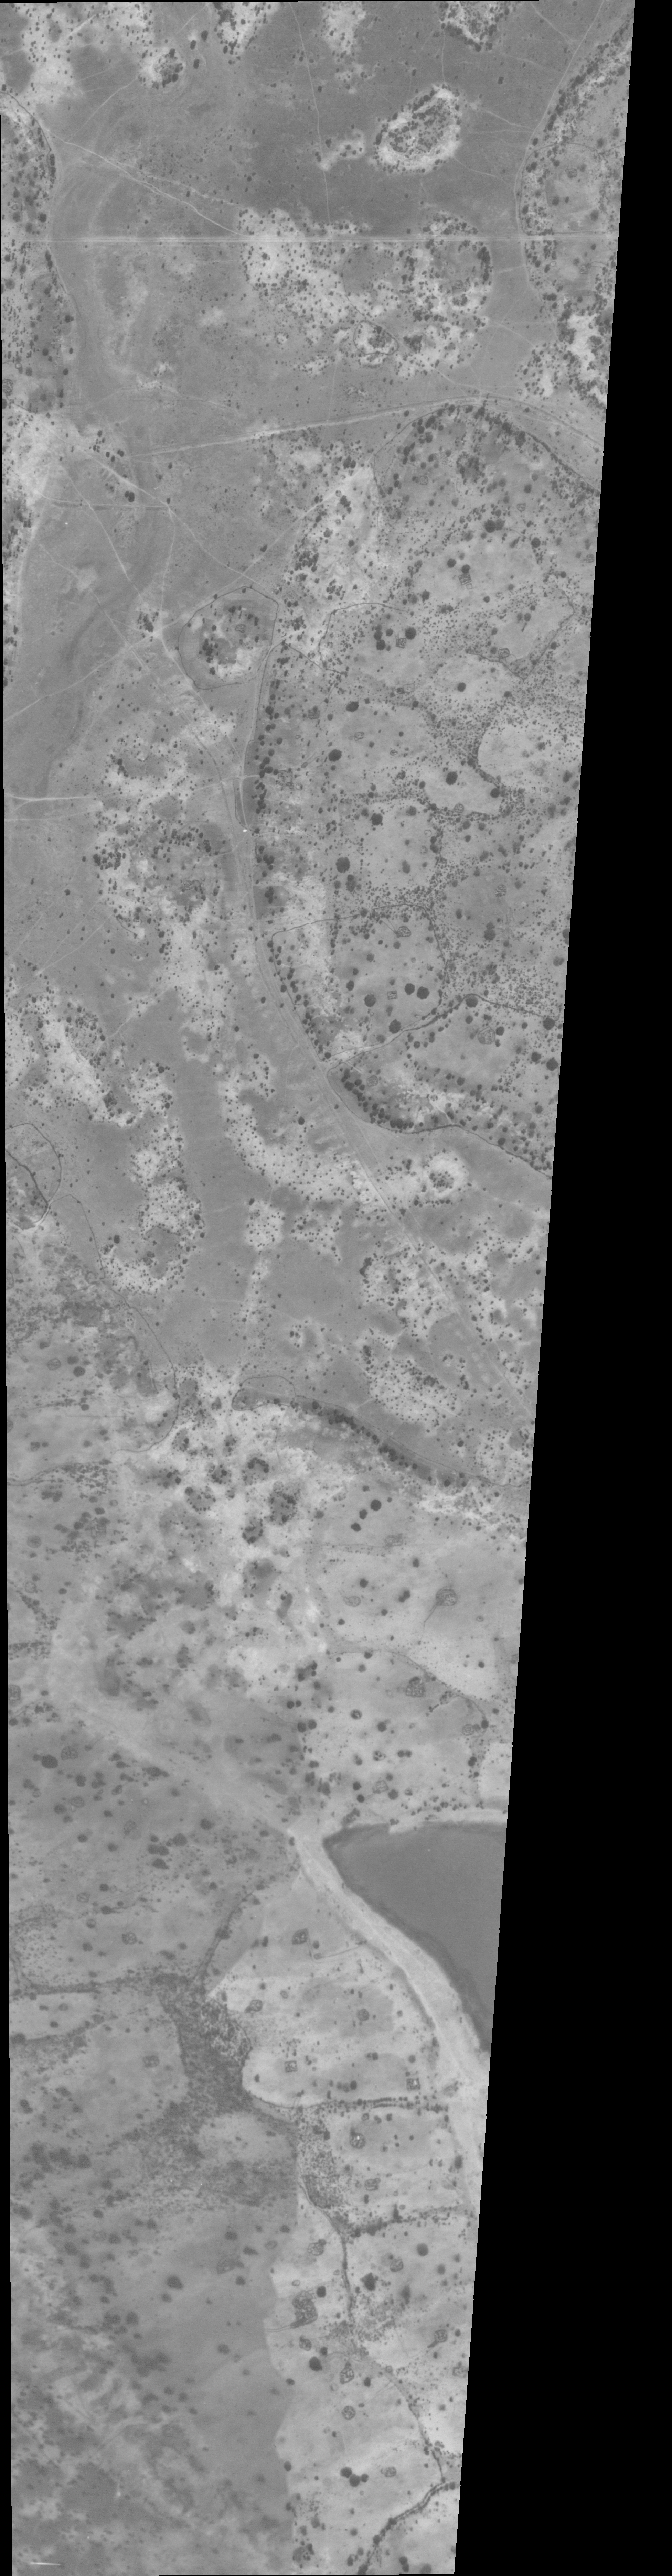

In [6]:
map